<a href="https://colab.research.google.com/github/dhamvi01/A-Beginner-Friendly-Guide-to-PyTorch/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

In [8]:
#!pip install tensorflow==1.4.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from tensorflow.examples.tutorials.mnist import input_data

#### Sample z from uniform distribution

In [2]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [3]:
# Input image, for discriminator model.
X = tf.placeholder(tf.float32, shape=[None, 784])

# Input noise for generator.
Z = tf.placeholder(tf.float32, shape=[None, 100])

#### Model building

In [4]:
def generator(z):
    with tf.variable_scope("generator", reuse=tf.AUTO_REUSE):
        x = tf.layers.dense(z, 128, activation=tf.nn.relu)
        x = tf.layers.dense(z, 784)
        x = tf.nn.sigmoid(x)
    return x

def discriminator(x):
    with tf.variable_scope("discriminator", reuse=tf.AUTO_REUSE):
        x = tf.layers.dense(x, 128, activation=tf.nn.relu)
        x = tf.layers.dense(x, 1)
        x = tf.nn.sigmoid(x)
    return x

In [5]:
# Generator model
G_sample = generator(Z)

# Discriminator models
D_real = discriminator(X)
D_fake = discriminator(G_sample)


# Loss function
D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

# Select parameters
disc_vars = [var for var in tf.trainable_variables() if var.name.startswith("disc")]
gen_vars = [var for var in tf.trainable_variables() if var.name.startswith("gen")]

# Optimizers
D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=disc_vars)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=gen_vars)

#### Model Training

In [6]:
# Batch size
mb_size = 128

# Dimension of input noise
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out2/'):
    os.makedirs('out2/')

i = 0

for it in range(100000):

    # Save generated images every 1000 iterations.
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

        fig = plot(samples)
        plt.savefig('out2/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)


    # Get next batch of images. Each batch has mb_size samples.
    X_mb, _ = mnist.train.next_batch(mb_size)


    # Run disciminator solver
    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})

    # Run generator solver
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    # Print loss
    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0
D loss: 1.173
Iter: 1000
D loss: 0.0001569
Iter: 2000
D loss: 0.0003748
Iter: 3000
D loss: 0.0002149
Iter: 4000
D loss: 0.0009387
Iter: 5000
D loss: 0.01255
Iter: 6000
D loss: 0.03046
Iter: 7000
D loss: 0.01231
Iter: 8000
D loss: 0.02083
Iter: 9000
D loss: 0.06619
Iter: 10000
D loss: 0.1109
Iter: 11000
D loss: 0.07137
Iter: 12000
D loss: 0.1212
Iter: 13000
D loss: 0.1014
Iter: 14000
D loss: 0.1284
Iter: 15000
D loss: 0.1651
Iter: 16000
D loss: 0.1479
Iter: 17000
D loss: 0.1388
Iter: 18000
D loss: 0.1705
Iter: 19

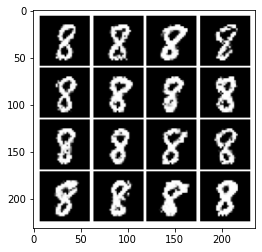

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('out2/077.png')
imgplot = plt.imshow(img)
plt.show()